In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/harikishanm96/MASTER -q --quiet
!mv MASTER/*.py .
!rm -rf MASTER
print("Loaded Modules and Models")

# Installing latest Albumentation library
!pip install -q torchsummary
!pip install -q albumentations
!pip install -q torch_lr_finder

# For inline matplotlib plotting
%matplotlib inline

Loaded Modules and Models


In [3]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=512)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True


/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


Files already downloaded and verified


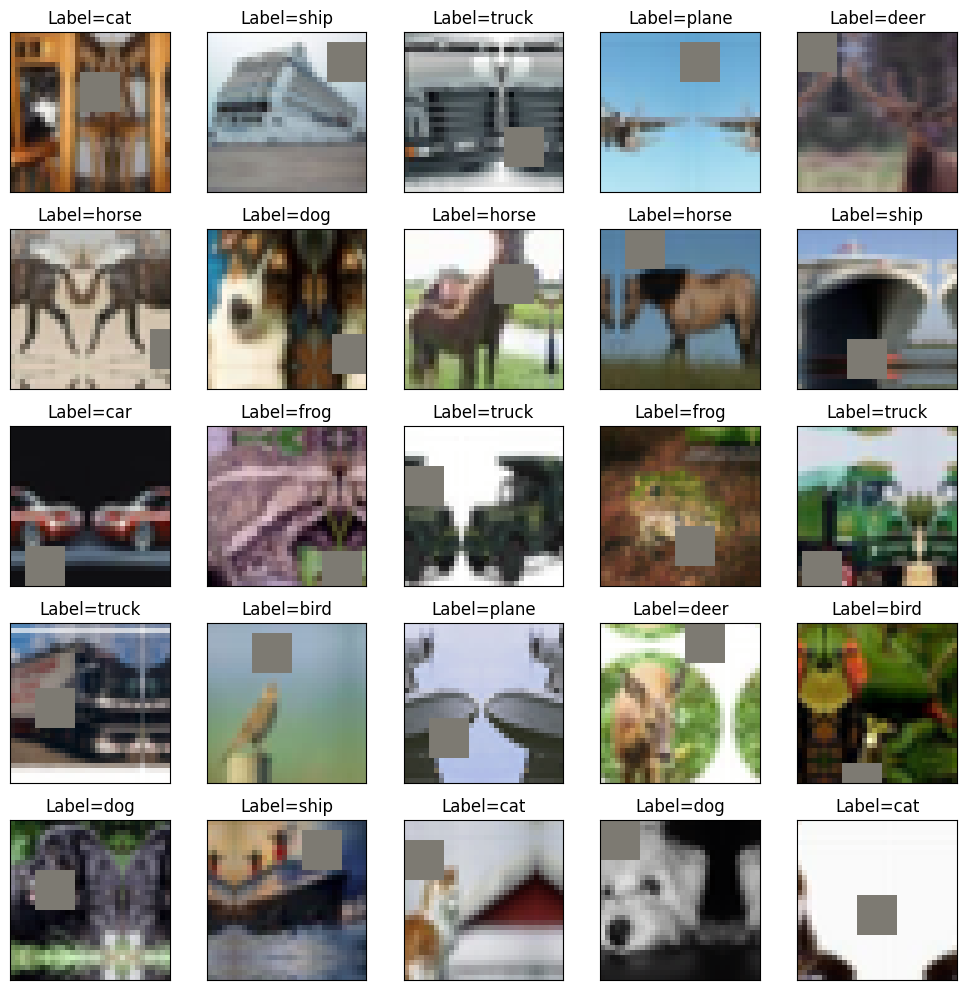

In [4]:
cifar10.sample_pictures(train_flag=True)

In [5]:
from custom_resnet import *

# Loading Custom Model
net = Net()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


In [6]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
                 X-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.32E-03


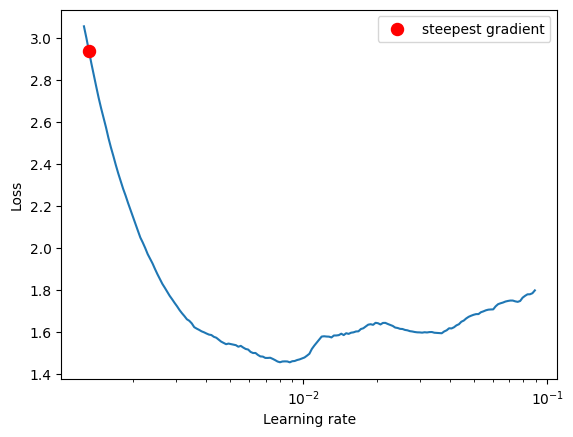

(<Axes: xlabel='Learning rate', ylabel='Loss'>, 0.0013200884008314178)

In [7]:
import copy
from torch_lr_finder import LRFinder
import torch.nn as nn
import numpy as np

net_exp = copy.deepcopy(net)
optimizer = torch.optim.Adam(net_exp.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(net_exp, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, end_lr=0.1, num_iter=200)
lr_finder.plot()

In [8]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01) #, momentum=0.85)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                                                max_lr=0.003,
                                                steps_per_epoch=len(trainloader),
                                                epochs=24,
                                                pct_start=0.2,
                                                div_factor=10,
                                                three_phase=False,
                                                final_div_factor=50,
                                                anneal_strategy='linear'
                                                ) #final_div_factor=100,

Epoch: 0,Loss=1.25 Batch_id=97 Accuracy=46.52: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]


Test set: Average loss: 0.0022, Accuracy: 5988/10000 (59.88%)



Epoch: 1,Loss=0.94 Batch_id=97 Accuracy=61.53: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]


Test set: Average loss: 0.0019, Accuracy: 6703/10000 (67.03%)



Epoch: 2,Loss=0.83 Batch_id=97 Accuracy=68.81: 100%|██████████| 98/98 [00:25<00:00,  3.87it/s]


Test set: Average loss: 0.0018, Accuracy: 6969/10000 (69.69%)



Epoch: 3,Loss=0.80 Batch_id=97 Accuracy=72.33: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]


Test set: Average loss: 0.0015, Accuracy: 7272/10000 (72.72%)



Epoch: 4,Loss=0.78 Batch_id=97 Accuracy=74.97: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]


Test set: Average loss: 0.0015, Accuracy: 7403/10000 (74.03%)



Epoch: 5,Loss=0.71 Batch_id=97 Accuracy=78.00: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]


Test set: Average loss: 0.0012, Accuracy: 8032/10000 (80.32%)



Epoch: 6,Loss=0.46 Batch_id=97 Accuracy=79.89: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]


Test set: Average loss: 0.0010, Accuracy: 8294/10000 (82.94%)



Epoch: 7,Loss=0.48 Batch_id=97 Accuracy=81.67: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Test set: Average loss: 0.0010, Accuracy: 8396/10000 (83.96%)



Epoch: 8,Loss=0.47 Batch_id=97 Accuracy=83.13: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]


Test set: Average loss: 0.0010, Accuracy: 8302/10000 (83.02%)



Epoch: 9,Loss=0.47 Batch_id=97 Accuracy=84.82: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]


Test set: Average loss: 0.0009, Accuracy: 8457/10000 (84.57%)



Epoch: 10,Loss=0.41 Batch_id=97 Accuracy=86.27: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Test set: Average loss: 0.0009, Accuracy: 8473/10000 (84.73%)



Epoch: 11,Loss=0.48 Batch_id=97 Accuracy=86.78: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]


Test set: Average loss: 0.0008, Accuracy: 8720/10000 (87.20%)



Epoch: 12,Loss=0.41 Batch_id=97 Accuracy=87.34: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]


Test set: Average loss: 0.0007, Accuracy: 8734/10000 (87.34%)



Epoch: 13,Loss=0.39 Batch_id=97 Accuracy=88.72: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]


Test set: Average loss: 0.0007, Accuracy: 8814/10000 (88.14%)



Epoch: 14,Loss=0.27 Batch_id=97 Accuracy=89.39: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]


Test set: Average loss: 0.0006, Accuracy: 8920/10000 (89.20%)



Epoch: 15,Loss=0.35 Batch_id=97 Accuracy=90.48: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]


Test set: Average loss: 0.0007, Accuracy: 8824/10000 (88.24%)



Epoch: 16,Loss=0.20 Batch_id=97 Accuracy=90.97: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]


Test set: Average loss: 0.0008, Accuracy: 8746/10000 (87.46%)



Epoch: 17,Loss=0.25 Batch_id=97 Accuracy=91.58: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]


Test set: Average loss: 0.0006, Accuracy: 8972/10000 (89.72%)



Epoch: 18,Loss=0.20 Batch_id=97 Accuracy=92.35: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]


Test set: Average loss: 0.0006, Accuracy: 8993/10000 (89.93%)



Epoch: 19,Loss=0.18 Batch_id=97 Accuracy=92.75: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]


Test set: Average loss: 0.0006, Accuracy: 9058/10000 (90.58%)



Epoch: 20,Loss=0.14 Batch_id=97 Accuracy=93.72: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]


Test set: Average loss: 0.0005, Accuracy: 9098/10000 (90.98%)



Epoch: 21,Loss=0.16 Batch_id=97 Accuracy=94.36: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]


Test set: Average loss: 0.0005, Accuracy: 9131/10000 (91.31%)



Epoch: 22,Loss=0.16 Batch_id=97 Accuracy=94.79: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]


Test set: Average loss: 0.0005, Accuracy: 9142/10000 (91.42%)



Epoch: 23,Loss=0.14 Batch_id=97 Accuracy=95.24: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]


Test set: Average loss: 0.0005, Accuracy: 9155/10000 (91.55%)

Finished Training


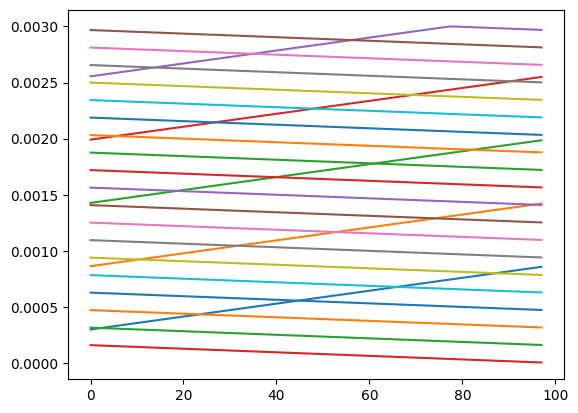

In [9]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 24

for epoch in range(EPOCHS):  # loop over the dataset multiple times
  #train.execute(net, device, batch, optimizer, criterion, epoch)
  train.execute(net, device, trainloader, optimizer, scheduler, criterion, epoch)
  test.execute(net, device, testloader, criterion)

print('Finished Training')

Files already downloaded and verified


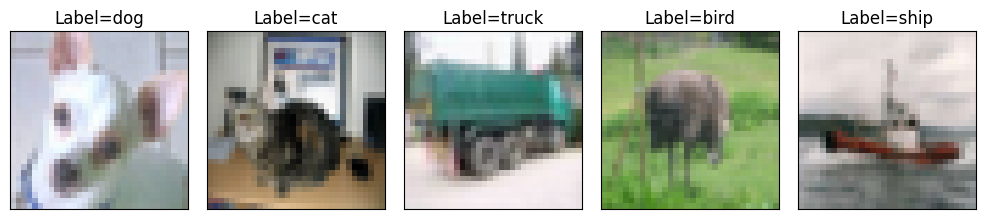

In [10]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

In [11]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:    cat   cat truck  bird  ship


In [12]:
from evaluate import *
calAccuracy(net, trainloader, device)

Accuracy of the network on the  train images: 94.626 %%


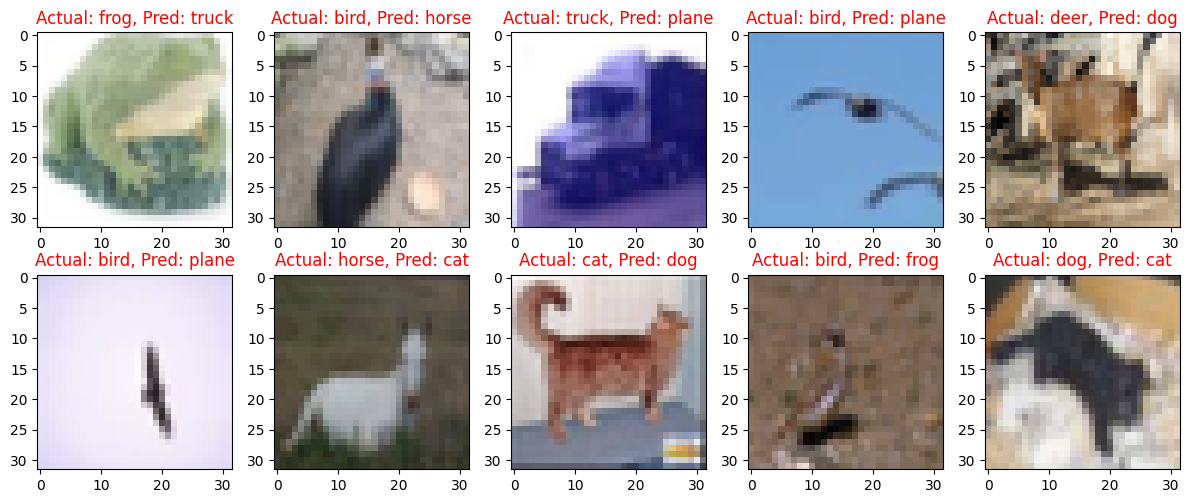

In [16]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)